**DATE 30.05.2025**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

visa_df=pd.read_csv('visadataset.csv')

cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns

In [2]:
wage_data=visa_df['prevailing_wage']
wage_data

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [7]:
p_25=np.percentile(wage_data,25)
p_50=np.percentile(wage_data,50)
p_75=np.percentile(wage_data,75)
p_25,p_50,p_75
print(p_25)
print(p_50)
print(p_75)

34015.479999999996
70308.20999999999
107735.51250000001


**Meaning**

In [ ]:
- 25percentage of applicans has wage less than 34015.47
    - 25*25480/100= 6370 application has wage less than 34015.47

- 50percentage of applicans has wage less than 70308.20
    - 50*25480/100=12740 applications has wage less than 70308.20

-75percentage of applicans has wage less than 107735.51
    - 75*25480/100=19110 applicants has wage less than 107735.51

**idea**

In [8]:
p_25=np.percentile(wage_data,25)
wage_data

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [13]:
p_25=np.percentile(wage_data,25)
con=wage_data<p_25
len(visa_df[con])

6370

In [14]:
P_50=np.percentile(wage_data,50)
con= wage_data<p_50
len(visa_df[con])

12740

In [15]:
p_75=np.percentile(wage_data,75)
con=wage_data<p_75
len(visa_df[con])

19110

**empirical Rule**

In [ ]:
- (μ ± σ) = 68% of data falls within 1 standard deviation of the mean (μ ± σ)

- (μ ± 2σ)= 95% falls within 2 standard deviations (μ ± 2σ)

- (μ ± 3σ)= 99.7% falls within 3 standard deviations (μ ± 3σ)

In [ ]:
**Empirical rule** # EDA means statistcal 

u-1*std to u+1*std =68%
or
    (μ ± σ) = 68% of data falls within 1 standard deviation of the mean (μ ± σ)


u-2*std to u+2*std =95%
or
    (μ ± 2σ)= 95% falls within 2 standard deviations (μ ± 2σ)


u-3*std to u+3*std =99.7%
or
    (μ ± 3σ)= 99.7% falls within 3 standard deviations (μ ± 3σ)

step-1: wage_mean
step-2: wage_std
step-3: lb=wage_mean-1*wage_std   # lower bound 
step-4: ub=wage_mean              # upper bound
step-5: con1=wage_data>lb
step-6: con2=wage_data<ub
step-7: con=con1 & con2
step-8: len(visa_df[con])==68*25480/100

In [17]:
wage_mean=wage_data.mean()
wage_std=wage_data.std()
lb=wage_mean-1*wage_std
ub=wage_mean+1*wage_std
con1=wage_data>lb
con2=wage_data<ub
con=con1 & con2
len(visa_df[con])==99.7*25480/100

False

In [18]:
wage_mean=wage_data.mean()
wage_std=wage_data.std()
lb=wage_mean-2*wage_std
ub=wage_mean+2*wage_std
con1=wage_data>lb
con2=wage_data<ub
con=con1 & con2
len(visa_df[con])==99.7*25480/100

False

In [19]:
wage_mean=wage_data.mean()
wage_std=wage_data.std()
lb=wage_mean-3*wage_std
ub=wage_mean+3*wage_std
con1=wage_data>lb
con2=wage_data<ub
con=con1 & con2
len(visa_df[con])==99.7*25480/100

False

**conclussion : Data does not following normal distribution**

**Histogram**

(array([6038., 5504., 5681., 4551., 2334.,  624.,  373.,  240.,  114.,
          21.]),
 array([2.13670000e+00, 3.19229500e+04, 6.38437634e+04, 9.57645767e+04,
        1.27685390e+05, 1.59606203e+05, 1.91527017e+05, 2.23447830e+05,
        2.55368643e+05, 2.87289457e+05, 3.19210270e+05]),
 <BarContainer object of 10 artists>)

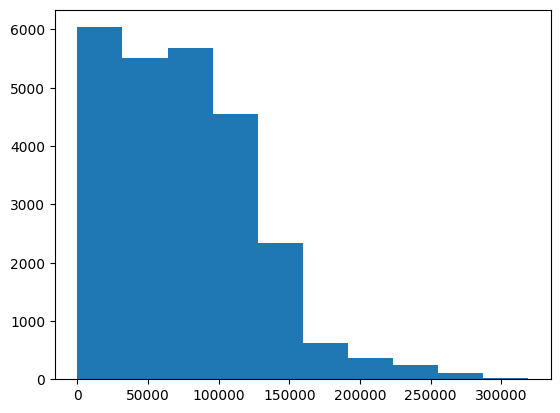

In [20]:
plt.hist(wage_data)

In [23]:
lb=wage_data>=2.13670000e+00
ub=wage_data<3.19229500e+04
con=lb & ub
len(visa_df[con])

6038

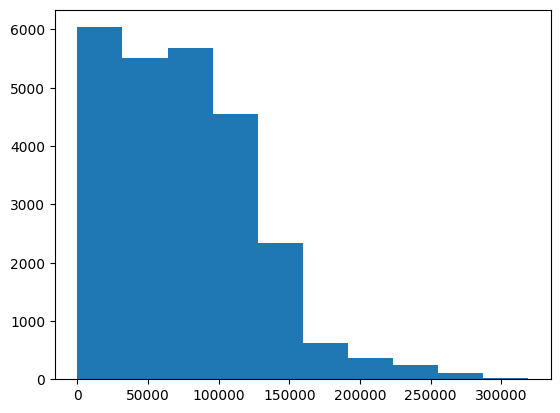

In [24]:
plt.hist(wage_data)
plt.show()

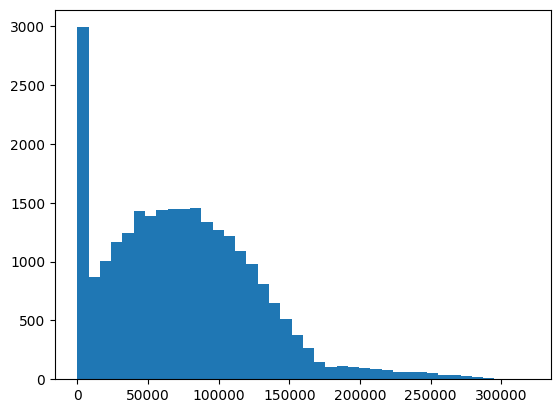

In [25]:
plt.hist(wage_data,bins=40)
plt.show()

**Boxplot**

{'whiskers': [<matplotlib.lines.Line2D at 0x194c14e82d0>,
 'caps': [<matplotlib.lines.Line2D at 0x194c14e87d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x194c14e8050>],
 'medians': [<matplotlib.lines.Line2D at 0x194c14e8550>],
 'fliers': [<matplotlib.lines.Line2D at 0x194c14e8410>],
 'means': []}

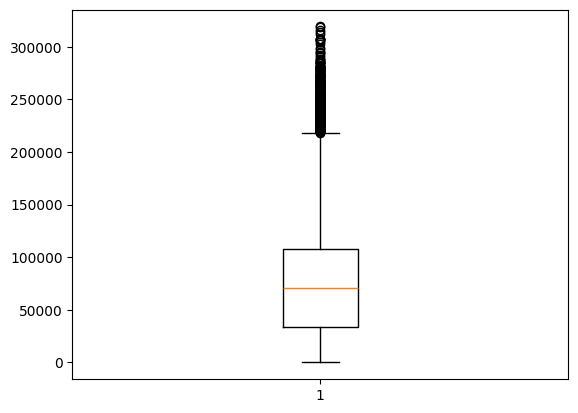

In [27]:
plt.boxplot(wage_data)

{'whiskers': [<matplotlib.lines.Line2D at 0x194c51282d0>,
 'caps': [<matplotlib.lines.Line2D at 0x194c5128550>,
 'boxes': [<matplotlib.lines.Line2D at 0x194c5128190>],
 'medians': [<matplotlib.lines.Line2D at 0x194c51287d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x194c5128910>],
 'means': []}

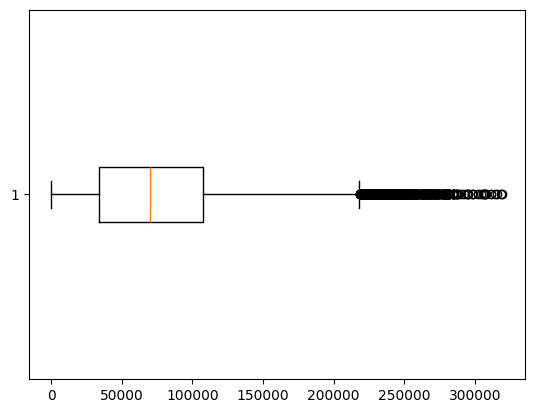

In [28]:
plt.boxplot(wage_data,vert=False)

In [ ]:
# how many outliers are there in this 

In [ ]:
        Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                       |-----:-----|
       o      |--------|     :     |--------|    o  o
                       |-----:-----|
     flier             <----------->            fliers
                            IQR

In [ ]:
# outliers will be available less than q1 and greater than q3
# lb=q1-1.5*IQR   lb= lower Bound
# ub=q3+1.5*IQR   ub= upper Bound

In [ ]:
step-1: q1,q2,q3
step-2: IQR
step-3: lb=q1-1.5*IQR
step-4: ub=q3+1.5*IQR
step-5: con1=wage_data<lb
step-6: con2=wage_data>ub
step-7: con=con1 | con2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

visa_df=pd.read_csv('Visadataset.csv')

cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns

wage_data=visa_df['prevailing_wage']
# step-1: Calculate q1, q2, q3
q1=visa_df['prevailing_wage'].quantile(0.25)
q2=visa_df['prevailing_wage'].quantile(0.50)
q3=visa_df['prevailing_wage'].quantile(0.75)
print("Q1:", q1, "Q2 (Median):",q2,  "Q3:", q3)
# step-2
IQR=q3-q1
print("IQR:", IQR)
# step-3: lb=q1-1.5*IQR
lb=q1-1.5*IQR
# step 4 : ub=q3-1.5*IQR
ub=q3+1.5*IQR
print("lower Bound:",lb,"upper Bound:",ub)
# step-5: create condition
con1=wage_data<lb
# step-6: create condition
con2=wage_data>ub

outlier_condition = (wage_data < lb) | (wage_data > ub)

#step-7: combine both conditions to detect outlier
con=(wage_data<lb) | (wage_data>ub)
outliers=wage_data[con]

# Filter full DataFrame — not just the Series
outliers_df = visa_df[outlier_condition]
print("Number of outliers:",len(outliers))
print(outliers_df.head())  # show first 5 rows as preview


# Export to CSV
outliers_df.to_csv("outliers_prevailing_wage.csv", index=False)
print("✅ Outliers saved to 'outliers_prevailing_wage.csv'")



Q1: 34015.479999999996 Q2 (Median): 70308.20999999999 Q3: 107735.51250000001
IQR: 73720.03250000002
lower Bound: -76564.56875000002 upper Bound: 218315.56125000003
Number of outliers: 427
     case_id      continent education_of_employee has_job_experience  \
14    EZYV15           Asia              Master's                  Y   
34    EZYV35           Asia              Master's                  N   
130  EZYV131  South America           High School                  N   
216  EZYV217           Asia              Master's                  Y   
221  EZYV222  North America             Doctorate                  Y   

    requires_job_training  no_of_employees  yr_of_estab region_of_employment  \
14                      Y            15756         2006                South   
34                      N             1809         2010                South   
130                     N             2554         2005              Midwest   
216                     N             1515         2001    

In [ ]:
# 73720

**✅ Optional: Visualize Outliers (Box Plot)**

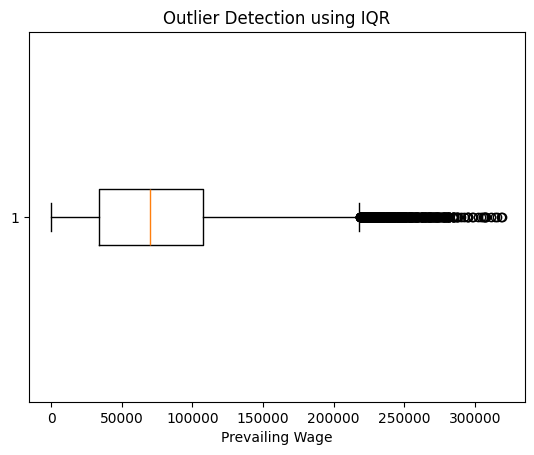

In [53]:
import matplotlib.pyplot as plt

plt.boxplot(wage_data, vert=False)
plt.title('Outlier Detection using IQR')
plt.xlabel('Prevailing Wage')
plt.show()


**Method-1: Drop the outliers**

- we need to extract non outliers data

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

visa_df=pd.read_csv('visadataset.csv')

cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [ ]:
         Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                       |-----:-----|
       o      |--------|     :     |--------|    o  o
                       |-----:-----|
     flier             <----------->            fliers
                            IQR

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

visa_df=pd.read_csv('visadataset.csv')

cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns

Q1: 34015.479999999996 Q2 (Median): 70308.20999999999 Q3: 107735.51250000001
IQR: 73720.03250000002
lower Bound: -76564.56875000002 upper Bound: 218315.56125000003
✅ Non-outliers saved to 'non_outliers_prevailing_wage.csv'


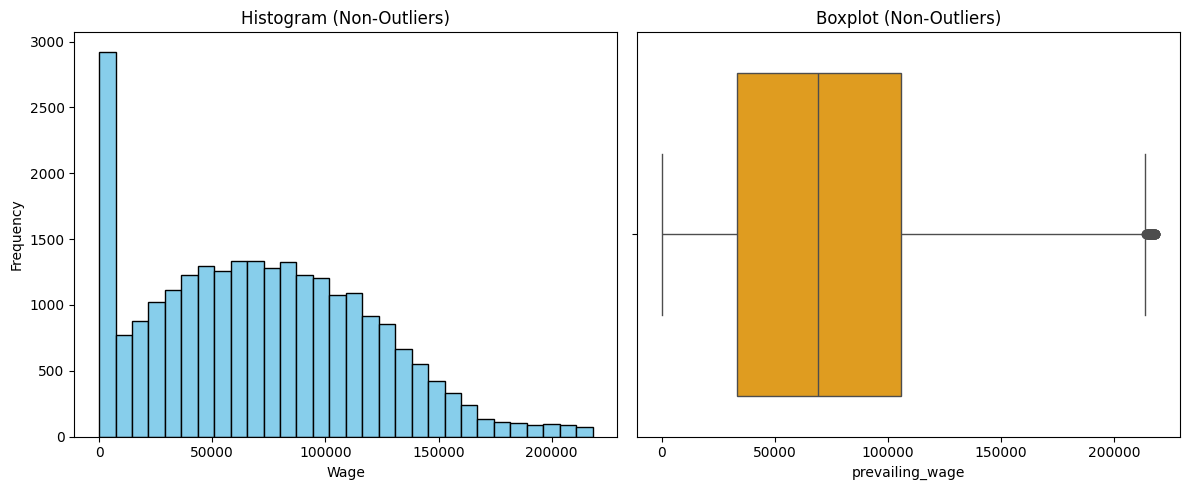

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

visa_df=pd.read_csv('visadataset.csv')

cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns

wage_data=visa_df['prevailing_wage']
# step-1: Calculate q1, q2, q3
q1=visa_df['prevailing_wage'].quantile(0.25)
q2=visa_df['prevailing_wage'].quantile(0.50)
q3=visa_df['prevailing_wage'].quantile(0.75)
print("Q1:", q1, "Q2 (Median):",q2,  "Q3:", q3)
# step-2
IQR=q3-q1
print("IQR:", IQR)
# step-3: lb=q1-1.5*IQR
lb=q1-1.5*IQR
# step 4 : ub=q3-1.5*IQR
ub=q3+1.5*IQR
print("lower Bound:",lb,"upper Bound:",ub)
# step-5: create condition
con1=wage_data>=lb
# step-6: create condition
con2=wage_data<=ub

non_outlier_condition = (wage_data >= lb) & (wage_data <= ub)

#step-7: combine both conditions to detect outlier
con=(wage_data>=lb) & (wage_data<=ub)
non_outliers=wage_data[con]

# Filter full DataFrame — not just the Series
non_outliers_df = visa_df[non_outlier_condition]
print("✅ Non-outliers saved to 'non_outliers_prevailing_wage.csv'")

# Step: Plot histogram and boxplot
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(non_outliers_df['prevailing_wage'], bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram (Non-Outliers)")
plt.xlabel("Wage")
plt.ylabel("Frequency")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=non_outliers_df['prevailing_wage'], color='orange')
plt.title("Boxplot (Non-Outliers)")

plt.tight_layout()
plt.show()

**✅ Task-3: Replace Outliers with Median (25,480)**

✅ Outliers replaced with median. Saved to 'wage_corrected.csv'


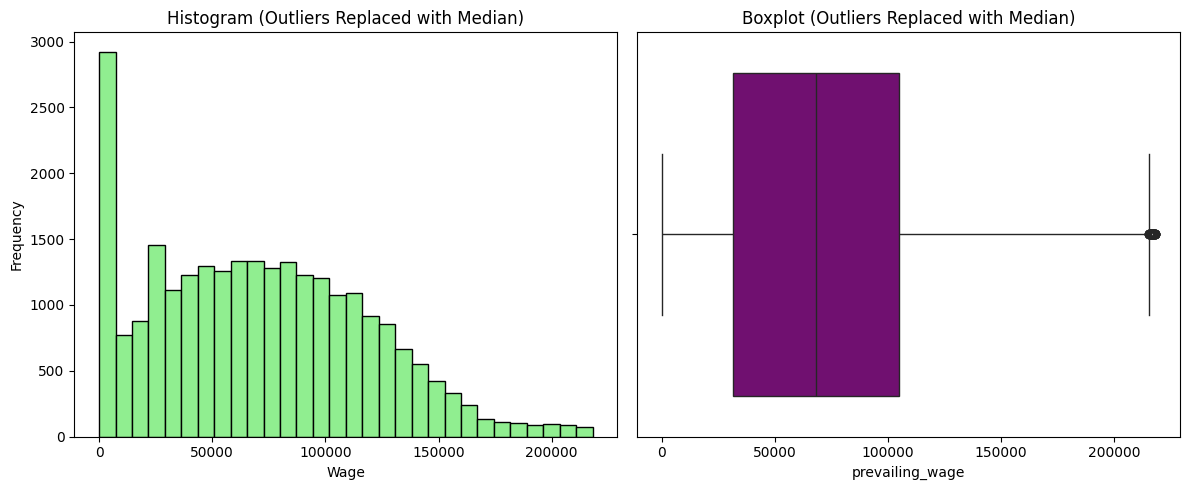

In [64]:
# Step: Replace outlier values with median wage
wage_median = 25480
visa_df_replaced = visa_df.copy()
visa_df_replaced.loc[~non_outlier_condition, 'prevailing_wage'] = wage_median  # replace outliers

# Optional: save the replaced DataFrame
visa_df_replaced.to_csv("wage_corrected.csv", index=False)
print("✅ Outliers replaced with median. Saved to 'wage_corrected.csv'")

# Step: Plot histogram and boxplot
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(visa_df_replaced['prevailing_wage'], bins=30, color='lightgreen', edgecolor='black')
plt.title("Histogram (Outliers Replaced with Median)")
plt.xlabel("Wage")
plt.ylabel("Frequency")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=visa_df_replaced['prevailing_wage'], color='purple')
plt.title("Boxplot (Outliers Replaced with Median)")

plt.tight_layout()
plt.show()


**✅ Task-4: 4x4 Subplot for All Wages**

In [ ]:
# ✅ Subplots Overview
# We’ll create a 2x2 grid (4 subplots):

# Original wages — Histogram

# Original wages — Boxplot

# Non-outlier wages — Histogram

# Replaced wages — Boxplot

**✅ Final Code for 2x2 Subplot**

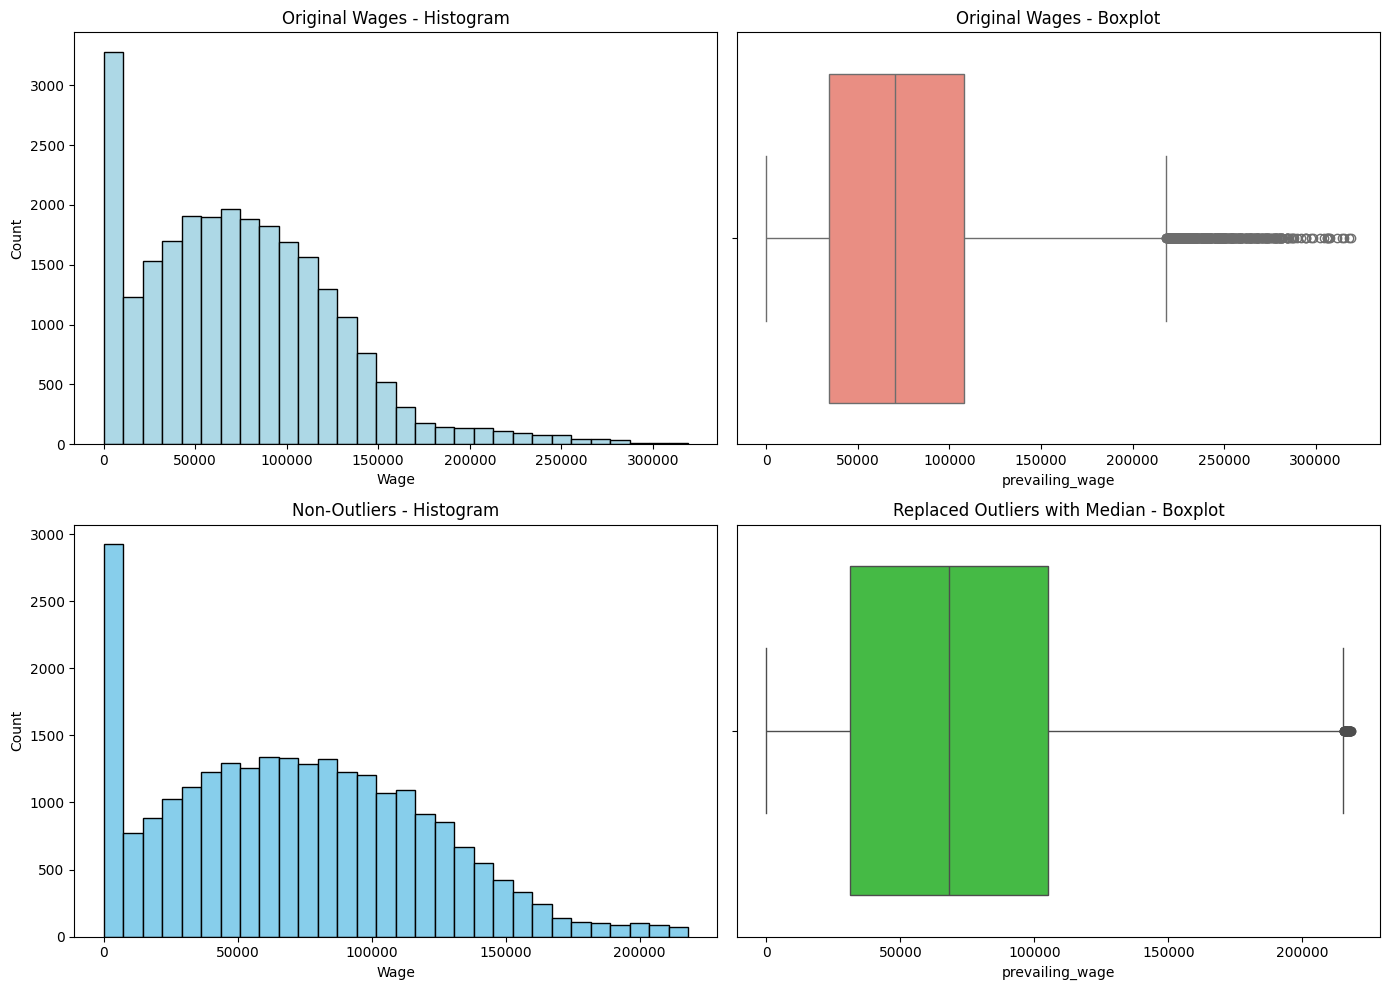

In [65]:
plt.figure(figsize=(14, 10))

# 1. Original Histogram
plt.subplot(2, 2, 1)
plt.hist(wage_data, bins=30, color='lightblue', edgecolor='black')
plt.title("Original Wages - Histogram")
plt.xlabel("Wage")
plt.ylabel("Count")

# 2. Original Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(x=wage_data, color='salmon')
plt.title("Original Wages - Boxplot")

# 3. Non-Outliers Histogram
plt.subplot(2, 2, 3)
plt.hist(non_outliers_df['prevailing_wage'], bins=30, color='skyblue', edgecolor='black')
plt.title("Non-Outliers - Histogram")
plt.xlabel("Wage")
plt.ylabel("Count")

# 4. Replaced Wages Boxplot
plt.subplot(2, 2, 4)
sns.boxplot(x=visa_df_replaced['prevailing_wage'], color='limegreen')
plt.title("Replaced Outliers with Median - Boxplot")

plt.tight_layout()
plt.show()


** ✅ Part 1: Storytelling with Summary Statistics and Interpretation**

- We will summarize:

    - Original Data

    - Non-Outlier Data

    - Outliers Replaced with Median

In [66]:
# Summary stats for storytelling
original_stats = wage_data.describe()
non_outlier_stats = non_outliers_df['prevailing_wage'].describe()
replaced_stats = visa_df_replaced['prevailing_wage'].describe()

# Combine into one DataFrame for comparison
summary_df = pd.DataFrame({
    'Original': original_stats,
    'Non-Outliers': non_outlier_stats,
    'Outliers Replaced': replaced_stats
})

# Save summary to CSV
summary_df.to_csv("wage_summary_stats.csv")
print("✅ Summary statistics saved as 'wage_summary_stats.csv'")

# Display the summary
print(summary_df.round(2))


✅ Summary statistics saved as 'wage_summary_stats.csv'
        Original  Non-Outliers  Outliers Replaced
count   25480.00      25053.00           25480.00
mean    74455.81      71501.03           70729.80
std     52815.94      48041.02           48001.67
min         2.14          2.14               2.14
25%     34015.48      33391.08           31336.52
50%     70308.21      69121.75           68074.15
75%    107735.51     105572.14          104945.23
max    319210.27     218094.61          218094.61


In [ ]:
#Storytelling Interpretation
#Version	Key Points
#Original	Includes extreme outliers, high max value, large standard deviation
#Non-Outliers	More stable range, reduced spread, better central tendency
#Outliers Replaced	Median replacement pulls max down, maintains dataset size and reduces distortion

# 📢 Takeaway: Handling outliers either by removal or replacement reduces noise and 
# improves the reliability of downstream models and visualizations.

**✅ Part 2: Save All Plots to Current Working Directory**

**📌 1. Save Plot: Histogram & Boxplot – Non-Outliers**

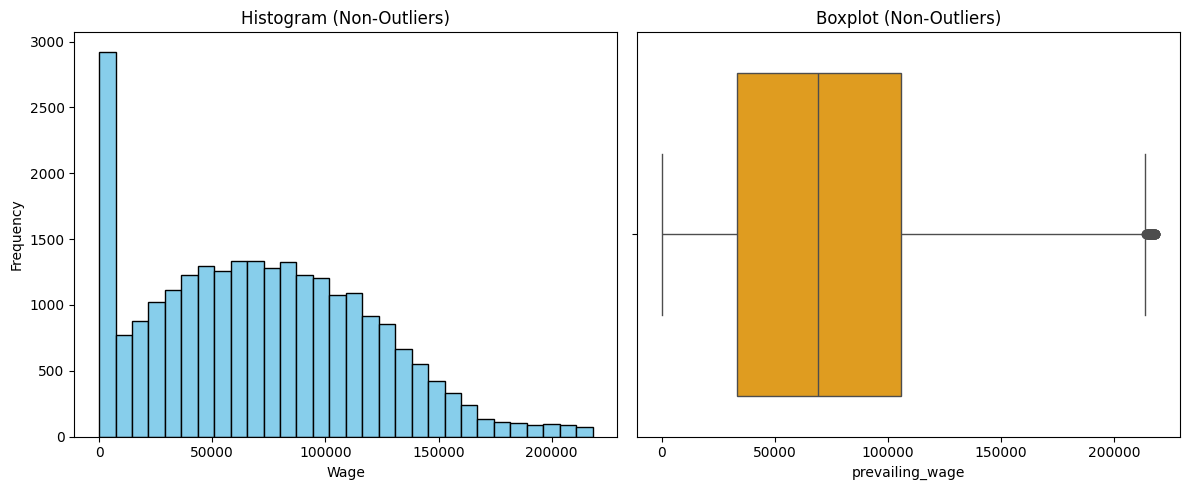

✅ Non-outlier plot saved as 'plot_non_outliers.png'


In [67]:
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(non_outliers_df['prevailing_wage'], bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram (Non-Outliers)")
plt.xlabel("Wage")
plt.ylabel("Frequency")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=non_outliers_df['prevailing_wage'], color='orange')
plt.title("Boxplot (Non-Outliers)")

plt.tight_layout()
plt.savefig("plot_non_outliers.png")  # Save here
plt.show()
print("✅ Non-outlier plot saved as 'plot_non_outliers.png'")


**📌 2. Save Plot: Outliers Replaced with Median**

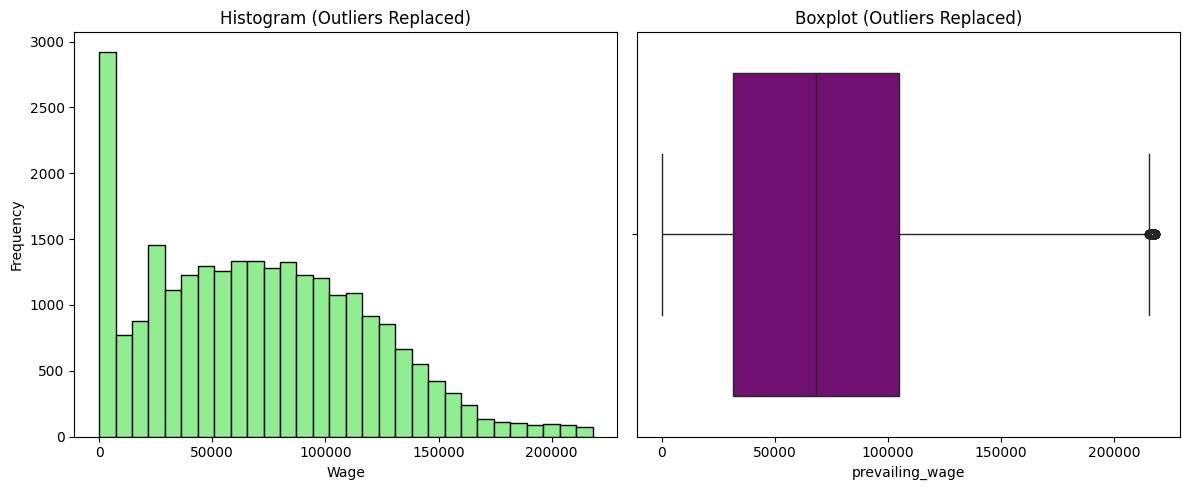

✅ Replaced outlier plot saved as 'plot_replaced_outliers.png'


In [68]:
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(visa_df_replaced['prevailing_wage'], bins=30, color='lightgreen', edgecolor='black')
plt.title("Histogram (Outliers Replaced)")
plt.xlabel("Wage")
plt.ylabel("Frequency")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=visa_df_replaced['prevailing_wage'], color='purple')
plt.title("Boxplot (Outliers Replaced)")

plt.tight_layout()
plt.savefig("plot_replaced_outliers.png")  # Save here
plt.show()
print("✅ Replaced outlier plot saved as 'plot_replaced_outliers.png'")


**📌 3. Save Plot: 4x4 Subplot Comparison**

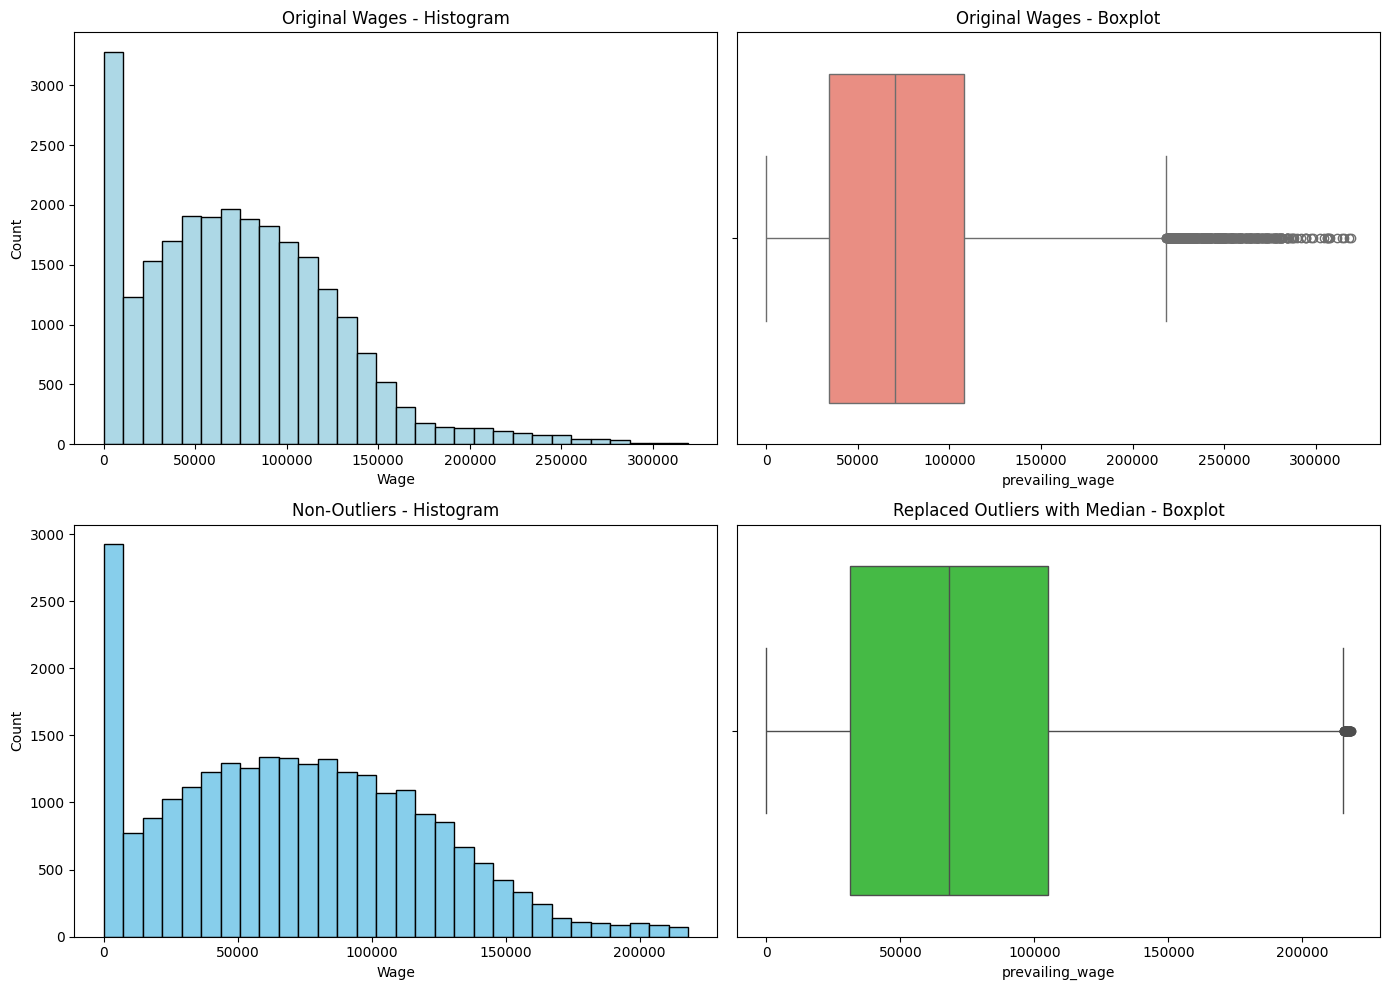

✅ 4x4 comparison plot saved as 'plot_all_4x4_comparison.png'


In [69]:
plt.figure(figsize=(14, 10))

# 1. Original Histogram
plt.subplot(2, 2, 1)
plt.hist(wage_data, bins=30, color='lightblue', edgecolor='black')
plt.title("Original Wages - Histogram")
plt.xlabel("Wage")
plt.ylabel("Count")

# 2. Original Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(x=wage_data, color='salmon')
plt.title("Original Wages - Boxplot")

# 3. Non-Outliers Histogram
plt.subplot(2, 2, 3)
plt.hist(non_outliers_df['prevailing_wage'], bins=30, color='skyblue', edgecolor='black')
plt.title("Non-Outliers - Histogram")
plt.xlabel("Wage")
plt.ylabel("Count")

# 4. Replaced Wages Boxplot
plt.subplot(2, 2, 4)
sns.boxplot(x=visa_df_replaced['prevailing_wage'], color='limegreen')
plt.title("Replaced Outliers with Median - Boxplot")

plt.tight_layout()
plt.savefig("plot_all_4x4_comparison.png")  # Save here
plt.show()
print("✅ 4x4 comparison plot saved as 'plot_all_4x4_comparison.png'")


**✅ 1. Save non_outliers_prevailing_wage.csv to Your Current Working Directory**

In [70]:
# Step: Create non-outlier condition
non_outlier_condition = (wage_data >= lb) & (wage_data <= ub)

# Step: Filter non-outlier records
non_outliers_df = visa_df[non_outlier_condition]

# Save non-outlier data to CSV
non_outliers_df.to_csv("non_outliers_prevailing_wage.csv", index=False)
print("✅ Non-outlier data saved as 'non_outliers_prevailing_wage.csv'")


✅ Non-outlier data saved as 'non_outliers_prevailing_wage.csv'


**✅ 2. Automatically Open Folder in Windows Explorer**

In [71]:
import os

# Get current working directory
cwd = os.getcwd()

# Open the folder in File Explorer (Windows only)
os.startfile(cwd)
print(f"📂 Folder opened: {cwd}")


📂 Folder opened: D:\NARESH IT\EDA


**✅ 3. Add Visual Storytelling Annotations to Plots (Example)**

- Here’s how to add annotations directly to your boxplot and histogram — making the story easier
- to understand visually.

**✅ Example: Annotated Boxplot for Non-Outliers**

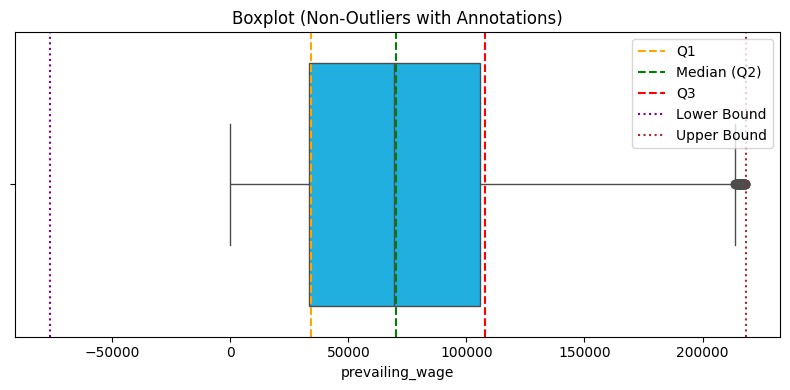

✅ Annotated boxplot saved as 'boxplot_non_outliers_annotated.png'


In [72]:
plt.figure(figsize=(8, 4))

sns.boxplot(x=non_outliers_df['prevailing_wage'], color='deepskyblue')
plt.title("Boxplot (Non-Outliers with Annotations)")

# Add annotations
plt.axvline(q1, color='orange', linestyle='--', label='Q1')
plt.axvline(q2, color='green', linestyle='--', label='Median (Q2)')
plt.axvline(q3, color='red', linestyle='--', label='Q3')
plt.axvline(lb, color='purple', linestyle=':', label='Lower Bound')
plt.axvline(ub, color='brown', linestyle=':', label='Upper Bound')

plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig("boxplot_non_outliers_annotated.png")
plt.show()
print("✅ Annotated boxplot saved as 'boxplot_non_outliers_annotated.png'")


In [73]:
import pandas as pd

# Correct filename (case-sensitive)
visa_df = pd.read_csv('Visadataset.csv')


**✅ Step 2: Save the non-outliers to CSV**
    
- Here’s the corrected full code to:

- Detect non-outliers,

- Save them as a new CSV in your current working directory (CWD),

- Automatically open the folder (on Windows),

- Ready for visual storytelling and annotations

In [74]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Load the data with correct case-sensitive filename
visa_df = pd.read_csv('Visadataset.csv')

# Step: Extract wage data
wage_data = visa_df['prevailing_wage']

# Step: Compute IQR bounds
q1 = wage_data.quantile(0.25)
q3 = wage_data.quantile(0.75)
IQR = q3 - q1
lb = q1 - 1.5 * IQR
ub = q3 + 1.5 * IQR

# Step: Create condition for NON-outliers
non_outlier_condition = (wage_data >= lb) & (wage_data <= ub)
non_outliers_df = visa_df[non_outlier_condition]

# Step: Save non-outlier data
non_outlier_file = "non_outliers_prevailing_wage.csv"
non_outliers_df.to_csv(non_outlier_file, index=False)
print(f"✅ Non-outliers saved to: {non_outlier_file}")

# Step: Automatically open the folder (on Windows)
cwd = os.getcwd()
os.startfile(cwd)


✅ Non-outliers saved to: non_outliers_prevailing_wage.csv


**✅ Code for Task 2: Histogram & Boxplot (Non-Outliers)**

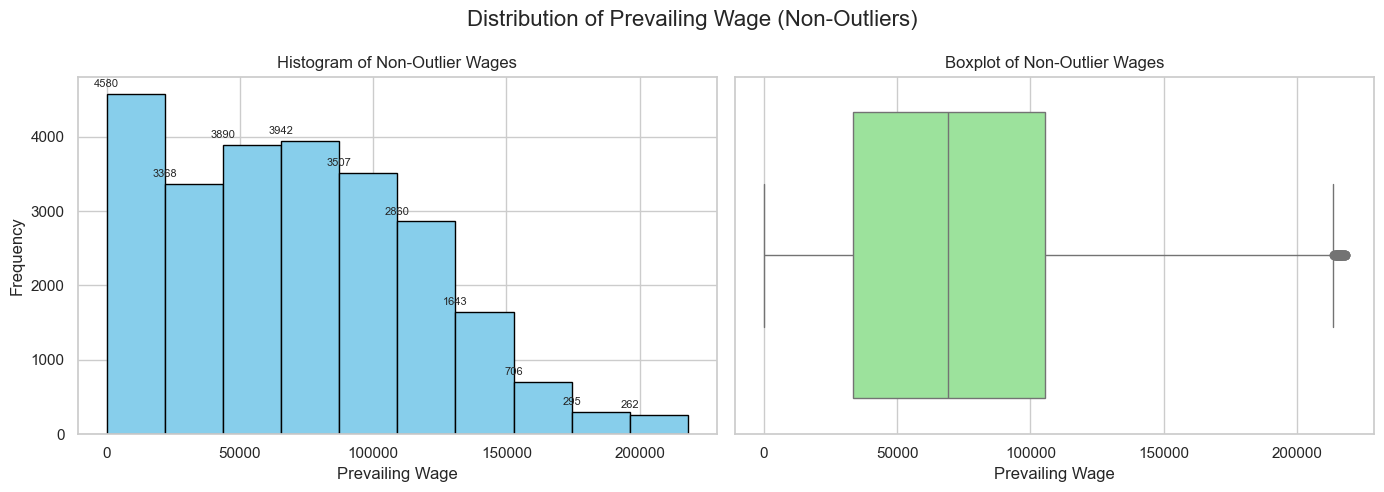

📊 Plots saved as 'non_outlier_wage_distribution.png' in CWD.


In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load non-outlier data
non_outliers_df = pd.read_csv("non_outliers_prevailing_wage.csv")
wage_data = non_outliers_df['prevailing_wage']

# Set the style
sns.set(style="whitegrid")

# Create the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle("Distribution of Prevailing Wage (Non-Outliers)", fontsize=16)

# Histogram
counts, bins, patches = axs[0].hist(wage_data, bins=10, color='skyblue', edgecolor='black')
axs[0].set_title("Histogram of Non-Outlier Wages")
axs[0].set_xlabel("Prevailing Wage")
axs[0].set_ylabel("Frequency")

# Annotate bin heights
for count, x in zip(counts, bins):
    axs[0].annotate(str(int(count)), xy=(x, count), xytext=(0, 5), textcoords="offset points", ha='center', fontsize=8)

# Boxplot
sns.boxplot(x=wage_data, ax=axs[1], color='lightgreen')
axs[1].set_title("Boxplot of Non-Outlier Wages")
axs[1].set_xlabel("Prevailing Wage")

# Save the figure
hist_boxplot_file = "non_outlier_wage_distribution.png"
plt.tight_layout()
plt.savefig(hist_boxplot_file)
plt.show()

print(f"📊 Plots saved as '{hist_boxplot_file}' in CWD.")


**✅ Task 3: Replace Outliers with the Median (25,480) and Replot**

- 🧠 Objective:

    - Replace all outlier values in prevailing_wage with the median (25,480).

- Plot:

    - Histogram with bin annotations

    - Boxplot

- Save updated DataFrame and plots in CWD.


✅ Cleaned file with replaced outliers saved: wage_median_fixed.csv


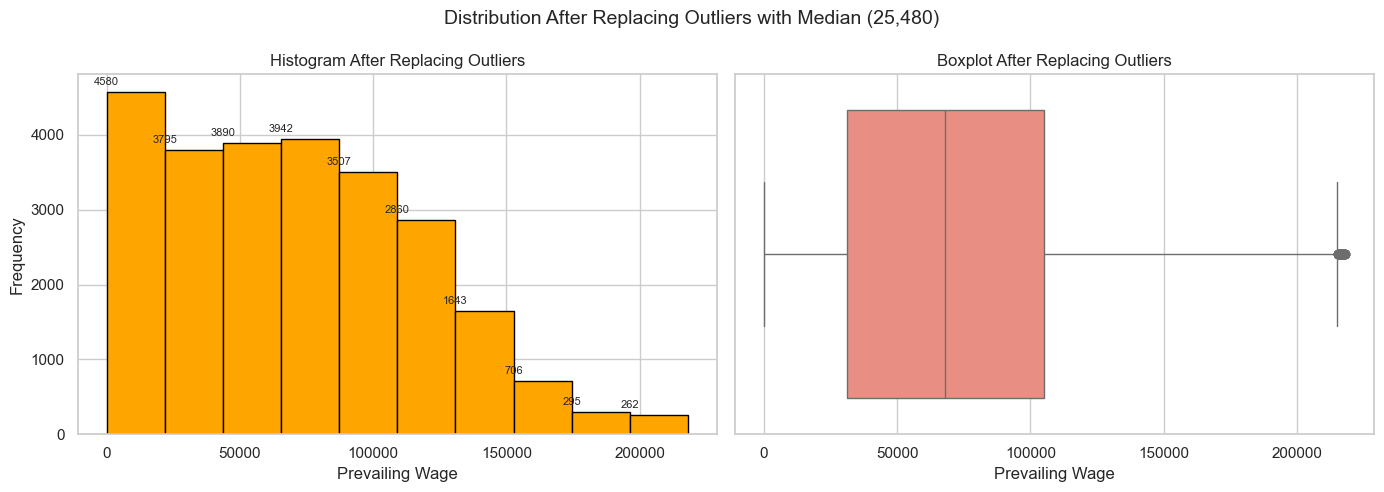

📊 Plots saved to 'outlier_replaced_distribution.png'


In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load original dataset
visa_df = pd.read_csv("Visadataset.csv")  # Note: capital "V"

# Define IQR boundaries
q1 = visa_df['prevailing_wage'].quantile(0.25)
q3 = visa_df['prevailing_wage'].quantile(0.75)
IQR = q3 - q1
lb = q1 - 1.5 * IQR
ub = q3 + 1.5 * IQR

# Replace outliers with median
median_value = 25480
visa_df['prevailing_wage_fixed'] = visa_df['prevailing_wage'].apply(
    lambda x: median_value if (x < lb or x > ub) else x
)

# Save cleaned file
visa_df.to_csv("wage_median_fixed.csv", index=False)
print("✅ Cleaned file with replaced outliers saved: wage_median_fixed.csv")

# Plot histogram + boxplot
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle("Distribution After Replacing Outliers with Median (25,480)", fontsize=14)

# Histogram
counts, bins, patches = axs[0].hist(visa_df['prevailing_wage_fixed'], bins=10, color='orange', edgecolor='black')
axs[0].set_title("Histogram After Replacing Outliers")
axs[0].set_xlabel("Prevailing Wage")
axs[0].set_ylabel("Frequency")

# Annotate bin counts
for count, x in zip(counts, bins):
    axs[0].annotate(str(int(count)), xy=(x, count), xytext=(0, 5), textcoords="offset points", ha='center', fontsize=8)

# Boxplot
sns.boxplot(x=visa_df['prevailing_wage_fixed'], ax=axs[1], color='salmon')
axs[1].set_title("Boxplot After Replacing Outliers")
axs[1].set_xlabel("Prevailing Wage")

# Save plot
plot_path = "outlier_replaced_distribution.png"
plt.tight_layout()
plt.savefig(plot_path)
plt.show()

print(f"📊 Plots saved to '{plot_path}'")


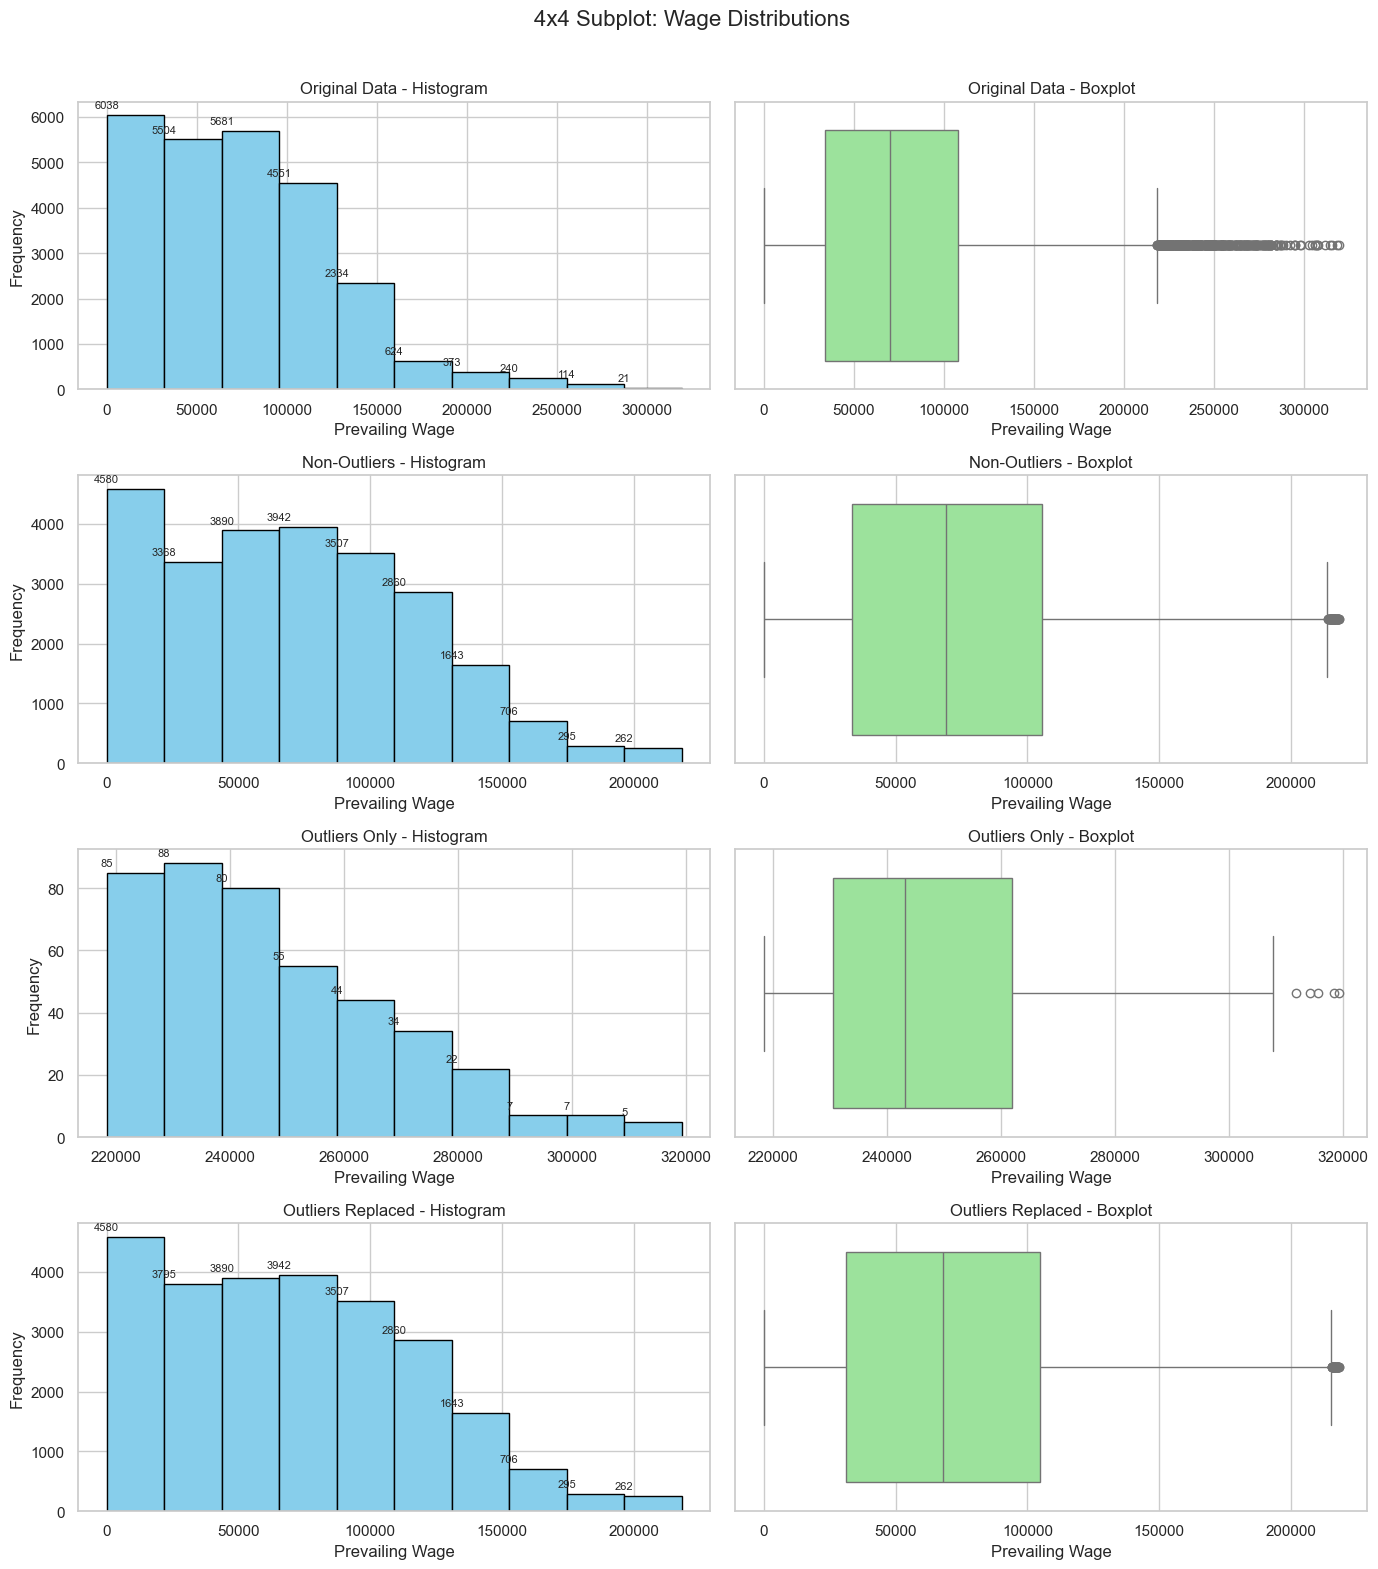

'4x4_wage_comparison_dashboard.png'

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load original dataset
visa_df = pd.read_csv("Visadataset.csv")

# IQR-based outlier boundaries
q1 = visa_df['prevailing_wage'].quantile(0.25)
q3 = visa_df['prevailing_wage'].quantile(0.75)
IQR = q3 - q1
lb = q1 - 1.5 * IQR
ub = q3 + 1.5 * IQR
median_value = 25480

# Separate datasets
original_data = visa_df['prevailing_wage']
non_outliers = visa_df[(visa_df['prevailing_wage'] >= lb) & (visa_df['prevailing_wage'] <= ub)]['prevailing_wage']
outliers = visa_df[(visa_df['prevailing_wage'] < lb) | (visa_df['prevailing_wage'] > ub)]['prevailing_wage']
replaced = visa_df['prevailing_wage'].apply(lambda x: median_value if (x < lb or x > ub) else x)

# Plot 4x4 dashboard
sns.set(style="whitegrid")
fig, axs = plt.subplots(4, 2, figsize=(14, 16))
fig.suptitle("4x4 Subplot: Wage Distributions", fontsize=16)

datasets = {
    "Original Data": original_data,
    "Non-Outliers": non_outliers,
    "Outliers Only": outliers,
    "Outliers Replaced": replaced
}

# Plotting histograms and boxplots for each dataset
for idx, (title, data) in enumerate(datasets.items()):
    row = idx
    # Histogram
    counts, bins, patches = axs[row][0].hist(data, bins=10, color='skyblue', edgecolor='black')
    axs[row][0].set_title(f"{title} - Histogram")
    axs[row][0].set_xlabel("Prevailing Wage")
    axs[row][0].set_ylabel("Frequency")
    for count, x in zip(counts, bins):
        axs[row][0].annotate(str(int(count)), xy=(x, count), xytext=(0, 5), textcoords="offset points", ha='center', fontsize=8)
    # Boxplot
    sns.boxplot(x=data, ax=axs[row][1], color='lightgreen')
    axs[row][1].set_title(f"{title} - Boxplot")
    axs[row][1].set_xlabel("Prevailing Wage")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plot_file = "4x4_wage_comparison_dashboard.png"
plt.savefig(plot_file)
plt.show()

plot_file  # Return the saved file path for user confirmation


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

visa_df=pd.read_csv('Visadataset.csv')

cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns

In [2]:
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

- variate: variables

- Bi Variate : Two variable analysis

- Multi variate : More than two variable analysis

In [ ]:
- total how many observations : 25480

- how many from asia : 17018

- denied 8462

- how many from asia : 16861

    - out of asia applicatants how many got visa: 

    - out of Asia applicants how many rejected visa 

In [8]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

In [ ]:
idea 
step-1 : con = case_status=='cert'
step-2 : con2= condition =='Asia'
step-3 : con=con1 & con2
step-4 : visa_df[con]
step-5 : len(visa_df[con])

Certified       Denied

Asia
Africa

In [9]:
con1=visa_df['case_status']=='Certified'
con2=visa_df['continent']=='Asia'
con=con1 & con2
len(visa_df[con])

11012

In [ ]:
certi_con=visa_df['case_status']=='Certified'
den_con=visa_df['case_status']=='Denied'
con=visa_df['coninent']=='Asia'
certi_data=certi_con & con 
den_data=den_con & con

len(visa_df[certi_data]), len(visa_df[den_data])

In [ ]:
lables=visa_df['continent'].value_counts().keys()
certi_count,den_count=[],[]
for i in lables:
    certi_con=visa_df['case_status']=='Certified'
    den_con=visa_df['case_status']=='Denied'
    con=visa_df['coninent']==i
    certi_data=certi_con & con 
    den_data=den_con & con
    certi_count.append(len(visa_df[certi_data]))
    den_count.append(len(visa_df[den_data]))

cols=visa_df['case_status']
pd.DataFrame(zip(certi_count,den_count),
            index=lables,
            columns=cols)
    

**method**

In [15]:
col1=visa_df['case_status']
col2=visa_df['continent']
pd.crosstab(col2,col1)

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


In [ ]:
col1=visa_df['case_status']
col2=visa_df['continent']
r1=pd.crosstab(col2,col1)

In [ ]:
r1.plot(kind='hist')

In [ ]:
r1.plot(kind='bar')

In [ ]:
**task**


In [22]:
col1=visa_df['case_status']
col2=visa_df['continent']
col3=visa_df['education_of_employee']
id=col2
cols=[col1,col3]
pd.crosstab(col2,cols)

case_status            Certified                                    Denied  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
continent                                                                    
Africa                        81        43          23      250         62   
Asia                        4407       780         676     5149       2761   
Europe                      1040       788         162      967        259   
North America                641       207         210      979        584   
Oceania                       38        19          19       46         28   
South America                160        75          74      184        173   

case_status                                           
education_of_employee Doctorate High School Master's  
continent                                             
Africa                       11          43       38  
Asia                        143        1614     1331  
Europe                       58         328      130  
North America                51         191      429  
Oceania                       3          17       22  
South America                14          63      109

In [ ]:
col1=visa_df['case_status']
col2=visa_df['continent']
col3=visa_df['education_of_employee']
id=col2
cols=[col1,col3]
pd.crosstab(col2,cols)

In [ ]:
**Numerical Columns analysis**

- scatter plots

- Corelation

In [ ]:
plt.scatter()

In [ ]:
x=[]
y=[]

plt.scatter()

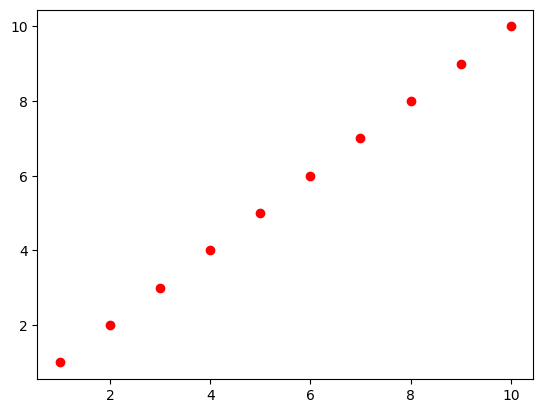

In [23]:
x=range(1,11)
y=range(1,11)

plt.scatter(x,y,c='Red')

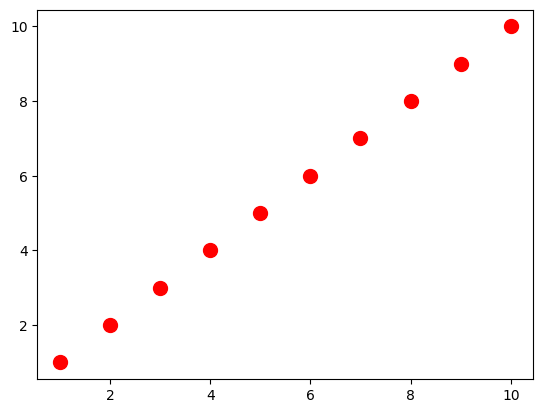

In [24]:
plt.scatter(x,y,c='Red',s=100)

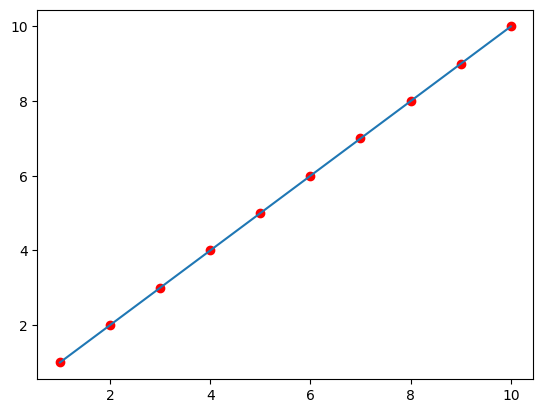

In [25]:
x=range(1,11)
y=range(1,11)

plt.scatter(x,y,c='Red')
plt.plot(x,y)

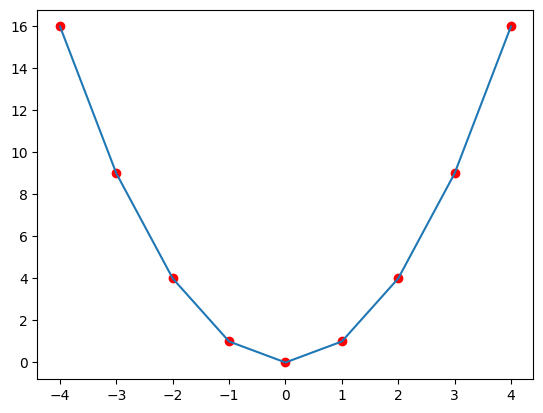

In [28]:
x=range(-4,5)
y=[i*i for i in x]

plt.scatter(x,y,c='Red')
plt.plot(x,y)

In [29]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

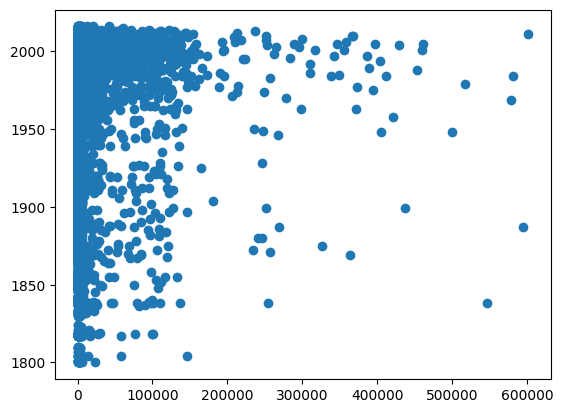

In [30]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
col3=visa_df['prevailing_wage']
plt.scatter(col1,col2)

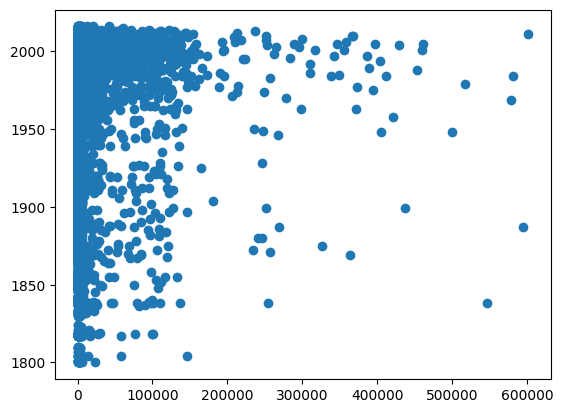

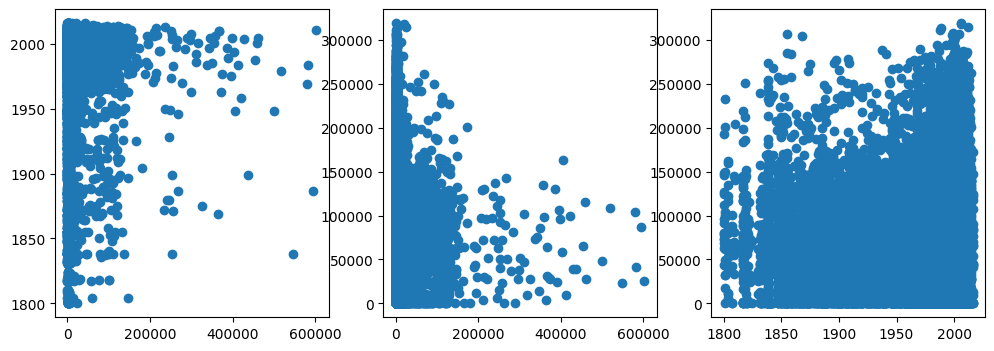

In [34]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
col3=visa_df['prevailing_wage']
plt.scatter(col1,col2)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.scatter(col1,col2)
plt.subplot(1,3,2)
plt.scatter(col1,col3)
plt.subplot(1,3,3)
plt.scatter(col2,col3)

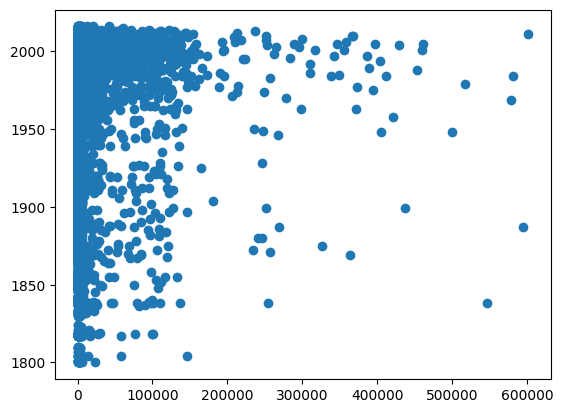

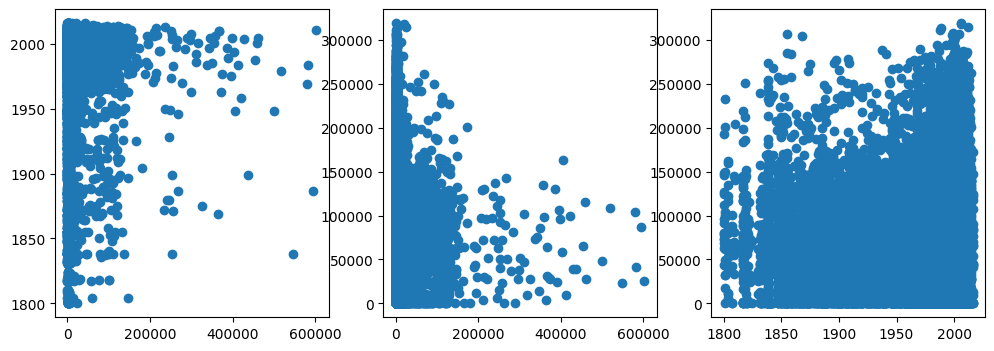

In [35]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
col3=visa_df['prevailing_wage']
plt.scatter(col1,col2)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1).scatter(col1,col2)

plt.subplot(1,3,2).scatter(col1,col3)

plt.subplot(1,3,3).scatter(col2,col3)


**correlation**

In [36]:
visa_df.corr()

ValueError: could not convert string to float: 'EZYV01'

In [37]:
#visa df has both numerical and categoi
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


In [ ]:
# read wine qulaity data 
# apply wine_data.corr()

In [44]:
wine_df=pd.read_csv('winequality_red')

FileNotFoundError: [Errno 2] No such file or directory: 'winequality_red'

<Axes: >

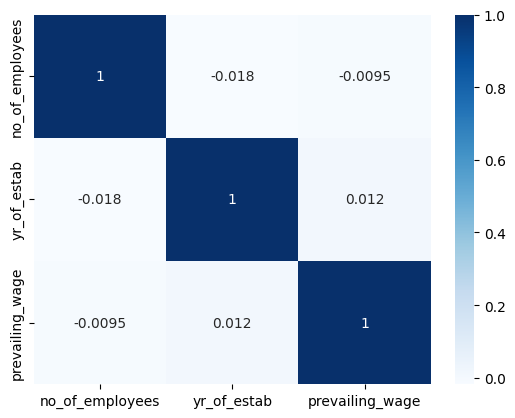

In [39]:
visa_corr=visa_df.corr(numeric_only=True)
sns.heatmap(visa_corr,
           annot=True,
           cmap='Blues')

In [46]:
winequality_red=pd.read-csv()

AttributeError: module 'pandas' has no attribute 'read'

In [ ]:
wine_corr=wine_df.corr(numeric=True)

In [ ]:
- generally we need good correlation between input and output columns

- we dont want a relation between input columns